In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn

In [31]:
data = pd.read_csv("data/data.csv", index_col=0)
labels = pd.read_csv("data/labels.csv", index_col=0)

In [32]:
mean_arr = np.mean(data, 0)
var_arr = np.var(data, 0)
data_new = data.drop(data.columns[np.argwhere(np.array(var_arr == 0)).flatten()], axis = 1)

In [34]:
from sklearn.feature_selection import SelectKBest 
labels_final = np.array(labels).ravel()
data_final = SelectKBest(k = 200).fit_transform(data_new, labels_final)

In [117]:
types = []
num_types = []
for label in labels_final:
    if label not in types:
        types.append(label)
        num_types.append(0)
    
    num_types[types.index(label)] += 1
print(num_types)

[136, 141, 300, 146, 78]


In [126]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import f1_score

betas = np.logspace(-8, 4, 30)
clf = LogisticRegressionCV(Cs = betas,
                           cv = 5,
                           random_state=0, 
                           solver = 'liblinear', 
                           intercept_scaling=10000, 
                           multi_class='ovr',
                           scoring = "f1").fit(data_final, labels_final)

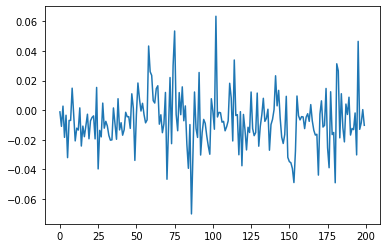

In [131]:
clf.coef_
plt.plot(clf.coef_[0])

In [104]:
clf.scores_

{'BRCA': array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]),
 'COAD': array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        ...,
        [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [0.66666667, 0.66666667, 0.66666667, ..., 1.        , 1.        ,
         1.        ]]),
 'KIRC': array([[0.8, 0.8, 1. , ..., 1. , 1. , 1. ],
        [1. , 1. , 1. , ..., 1. , 1. , 1. ],
        [1. , 1. , 1. , ..., 1. , 1. , 1. ],
 

[136, 141, 300, 146, 78]


In [78]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we